In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [5]:
df1 = pd.read_csv('generic_poll_lead.csv')

In [44]:
df2 = pd.read_csv('social-spending.csv')

In [7]:
df3 = pd.read_csv('cook_pvi.csv')

In [8]:
df1.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


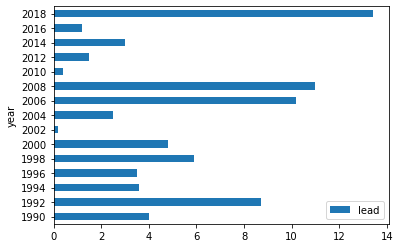

In [11]:
df1.sort_values(by = 'year').plot(x = 'year', y = 'lead', kind = 'barh')

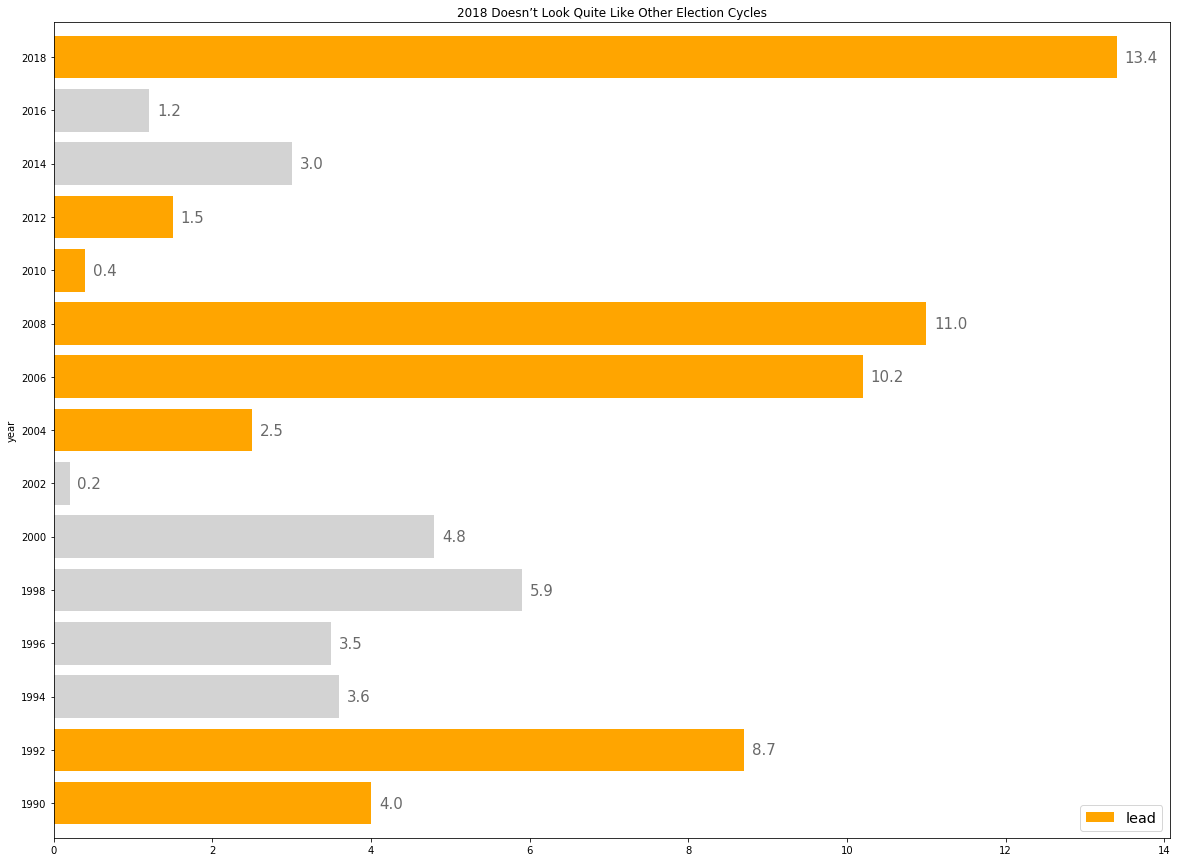

In [40]:
def build_colors(row):
    if row['in_power'] == 'yes':
        return 'lightgrey'
#     elif row['in_power'] == 'no':
#         return 'yellow'
    else:
        return 'orange'

df1['colors'] = df1.reset_index().apply(build_colors, axis=1)

ax = df1.sort_values(by = 'year').plot(x = 'year', 
                                  y = 'lead',
                                  kind = 'barh', 
                                  color = df1.sort_values(by = 'year').colors, 
                                  width = 0.8,
                                 figsize = [20,15],
                                 title = '2018 Doesn’t Look Quite Like Other Election Cycles')
params = {'legend.fontsize': 'x-large'}
pylab.rcParams.update(params)

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
    
plt.tight_layout
plt.savefig('output.pdf')

In [42]:
df2

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%
5,Austria,27.8%
6,Sweden,27.1%
7,Greece,25.0%
8,Germany,25.3%
9,Norway,25.1%


In [71]:
percents = []
for spending in df2['Social Spending']:
    percent = spending.split('%')[0]
    percents.append(percent)
df2['percents'] = percents
df2.percents = df2.percents.astype('float')
df2.head()

,Country,Social Spending,percents
0,France,31.5%,31.5
1,Finland,30.8%,30.8
2,Belgium,29.0%,29.0
3,Italy,28.9%,28.9
4,Denmark,28.7%,28.7


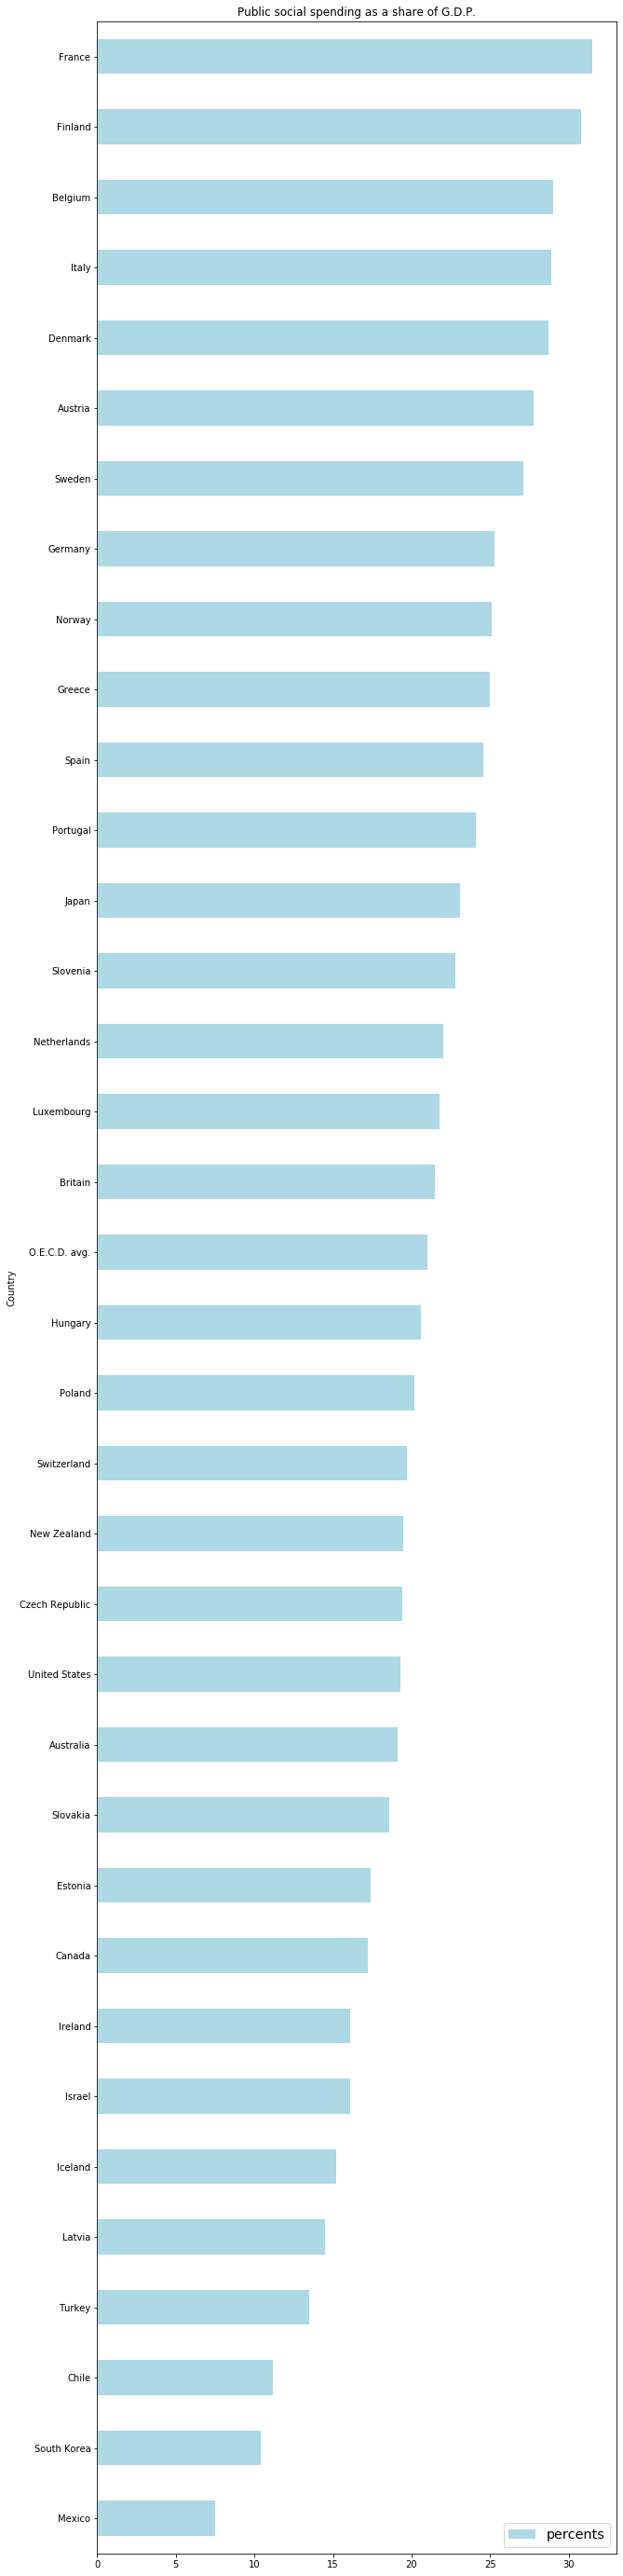

In [83]:
def build_colors(row):
    if row['Country'] == ['Finland', 'Denmark', 'Sweden', 'Norway', 'O.E.C.D. avg.', 'United States	']:
        return 'darkblue'
#     elif row['in_power'] == 'no':
#         return 'yellow'
    else:
        return 'lightblue'
df2['colors'] = df2.reset_index().apply(build_colors, axis=1)

ax = df2.sort_values(by = 'percents').plot(x = 'Country', 
            y = 'percents',
            kind = 'barh', 
            color = df2.sort_values(by = 'percents').colors, 
            width = 0.5,
            figsize = [10,50],
            title = 'Public social spending as a share of G.D.P.',
            )
# for i in ax.patches:
#     ax.text(i.get_width()+.1, i.get_y()+.31, \
#             str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
plt.tight_layout
plt.savefig('percent.pdf')